In [2]:
# Importando las bibliotecas necesarias
import yfinance as yf
import pandas as pd

# Definir el ticker para Bitcoin
ticker = 'BTC-USD'

# Crear el objeto de datos
data = yf.Ticker(ticker)
# Obtener datos históricos desde el inicio hasta la fecha actual
hist_full = data.history(period="1d", start="2010-01-01")
# Calculando el precio promedio como el promedio de Apertura, Máximo, Mínimo y Cierre
hist_full['Average_Price'] = hist_full[['Open', 'High', 'Low', 'Close']].mean(axis=1)
# Seleccionando solo las columnas 'Date' y 'Average_Price'
bitcoin_avg_price_full = hist_full[['Average_Price']]
# Cambiando el formato del índice (timestamp) para que solo tenga la fecha
bitcoin_avg_price_full.index = bitcoin_avg_price_full.index.date
time = bitcoin_avg_price_full.index.astype(str).tolist()
price = bitcoin_avg_price_full['Average_Price'].values



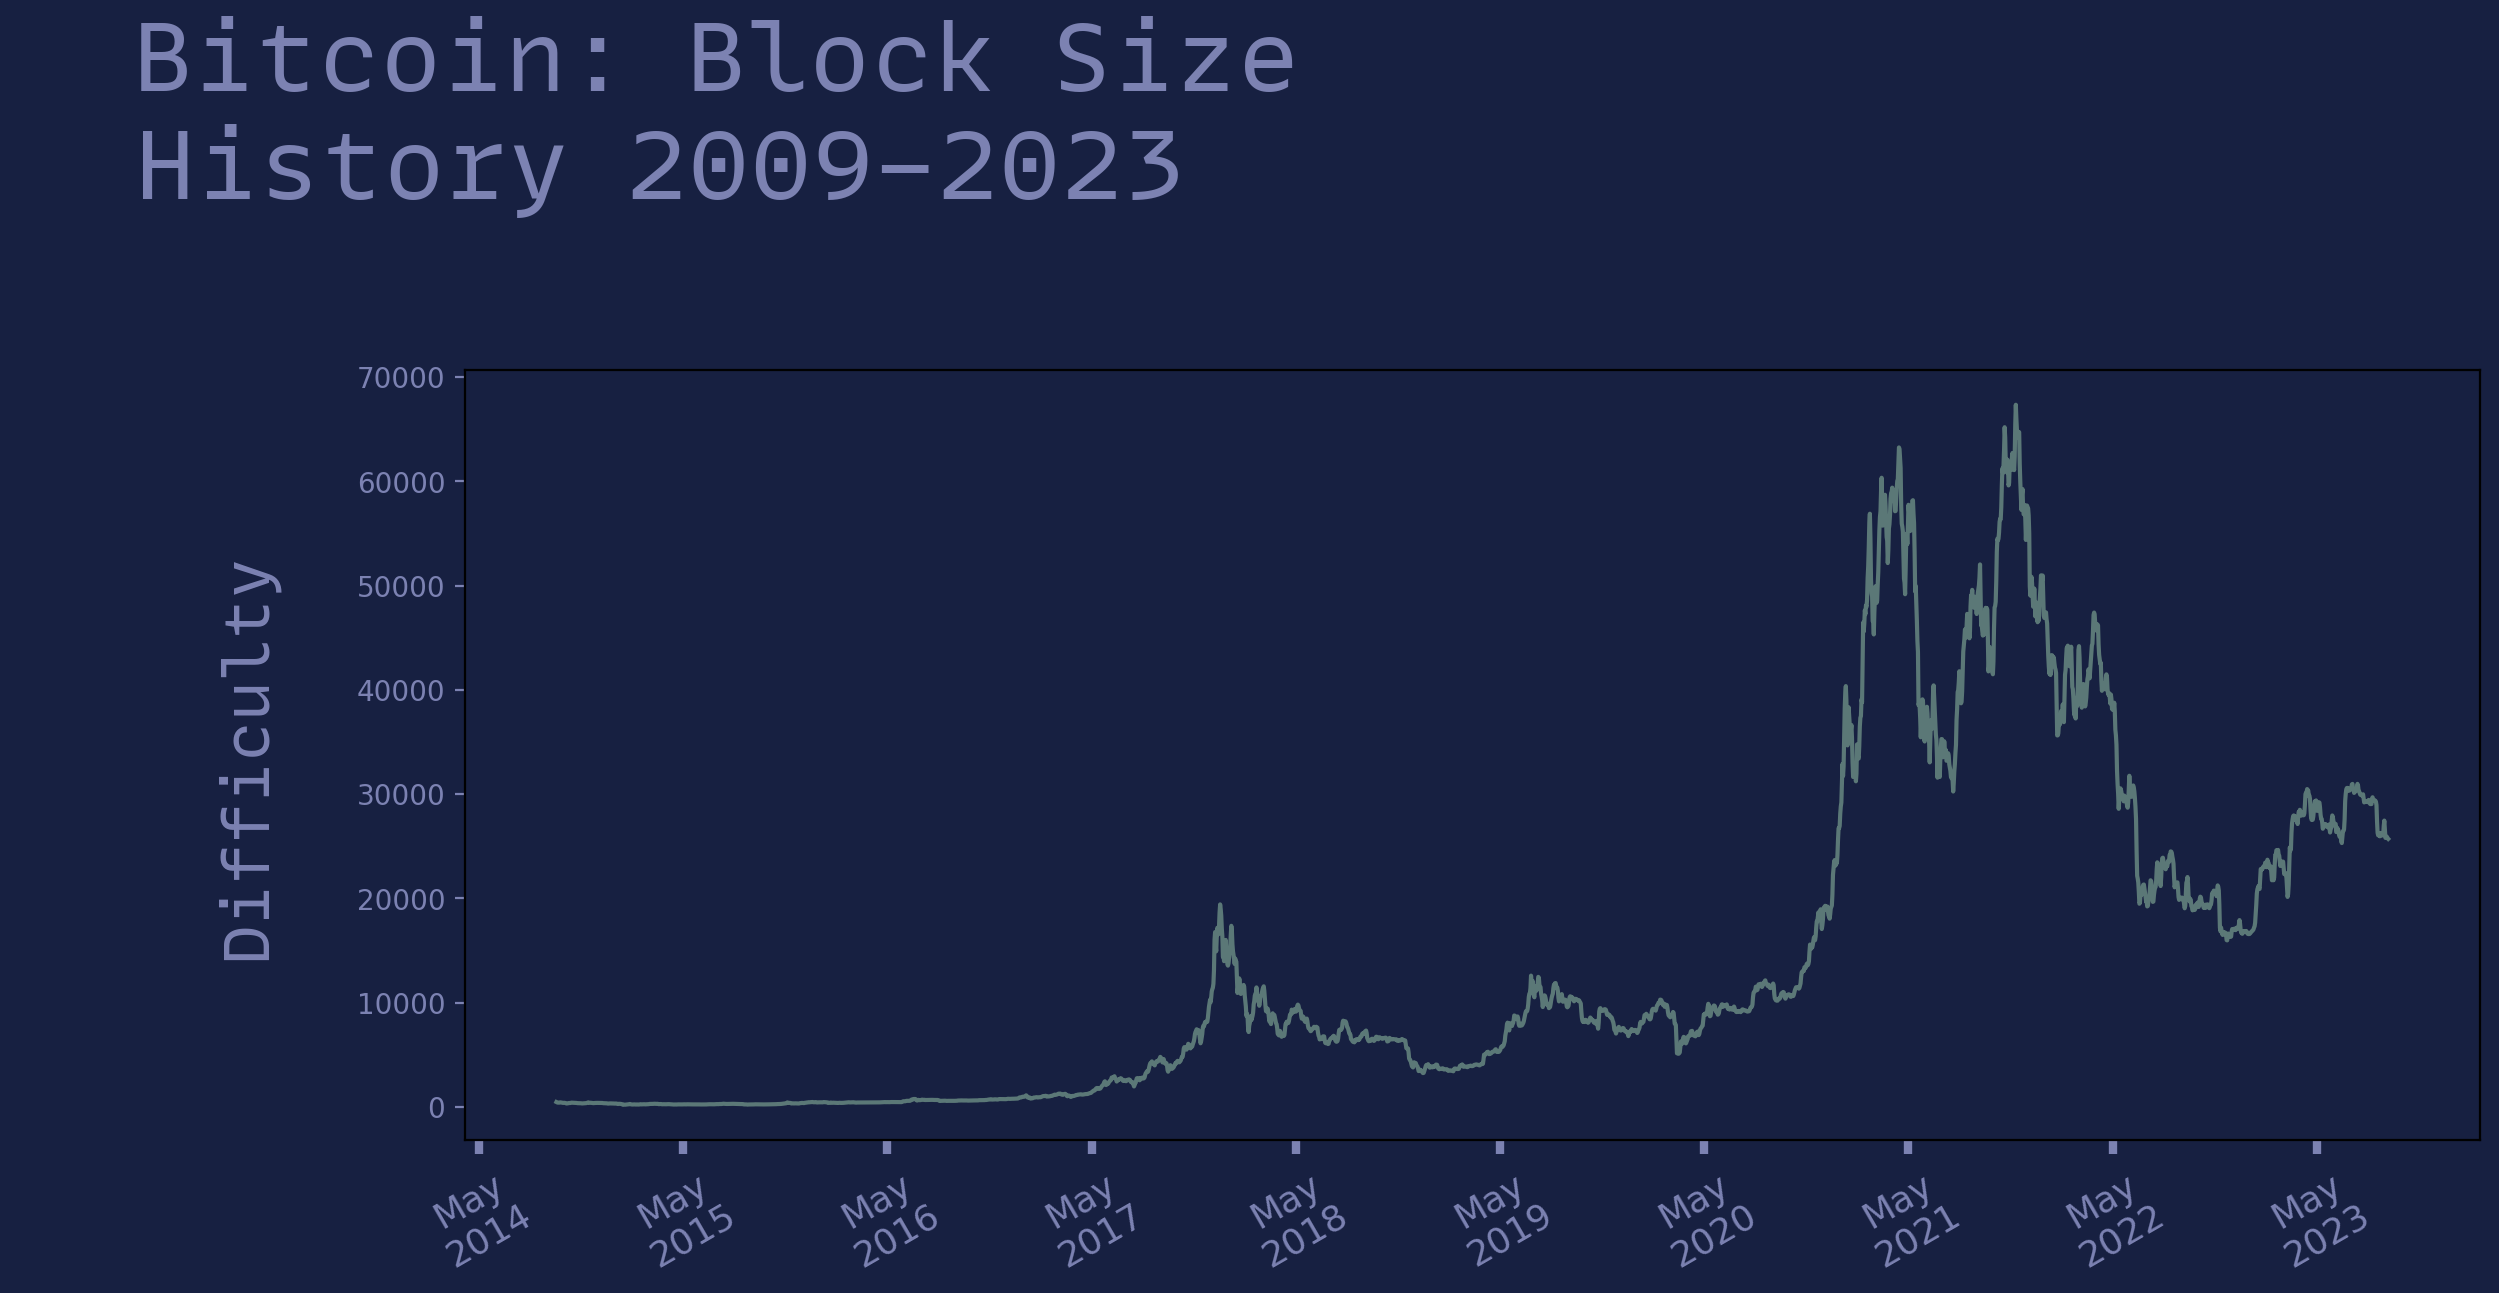

<Figure size 640x480 with 0 Axes>

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager as fm
from PIL import Image
from datetime import datetime
from app.styles import Estilos, colores
from app.readata import leer_data,time_data,estado_data,last_block

# Cambiar la tipografia
fpath = os.path.join('bins/MonoLisaSimpson.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

tipo='estilo_dark'

time = time_data(time)
if tipo[7:8]=='d':
    tw1 = Image.open('bins/br_w.png')
else:
    tw1 = Image.open('bins/br_d.png')


tw1_resized = tw1.resize((int(tw1.width * 0.5), int(tw1.height * 0.5)))  # Reduce el tamaño de la imagen a la mitad
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
tw1_array = np.array(tw1_resized)

fig, ax = plt.subplots(figsize=(13,5), dpi=200)
fig.patch.set_facecolor(Estilos[tipo][1])
ax.patch.set_facecolor(Estilos[tipo][1])

preferencias = {'color':Estilos[tipo][0],'fontproperties':prop}
plt.suptitle("  Bitcoin: Block Size\nHistory 2009-2023",fontsize=35,x=0.20,y=1.23,**preferencias)
 
locator = mdates.MonthLocator(interval=12)
formatter = mdates.DateFormatter('%B\n%Y')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(labelsize=13, rotation=30,length=5,width=3)
ax.tick_params(axis='both',colors=Estilos[tipo][0])
ax.set_ylabel('Difficulty\n', fontsize=23,**preferencias)
 
ax.plot(time,price,color=colores[3])

tw1_resized = tw1.resize((int(tw1.width * 0.5), int(tw1.height * 0.5)))  # Reduce el tamaño de la imagen a la mitad
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
tw1_array = np.array(tw1_resized)


fig.figimage(tw1_array, xo=1500, yo=1050, alpha=0.55, zorder=1)
plt.subplots_adjust(wspace=0.3, hspace=1)
plt.show()
plt.savefig('analisis/resultados/price'+tipo+'.png',bbox_inches='tight',pad_inches=0.5)





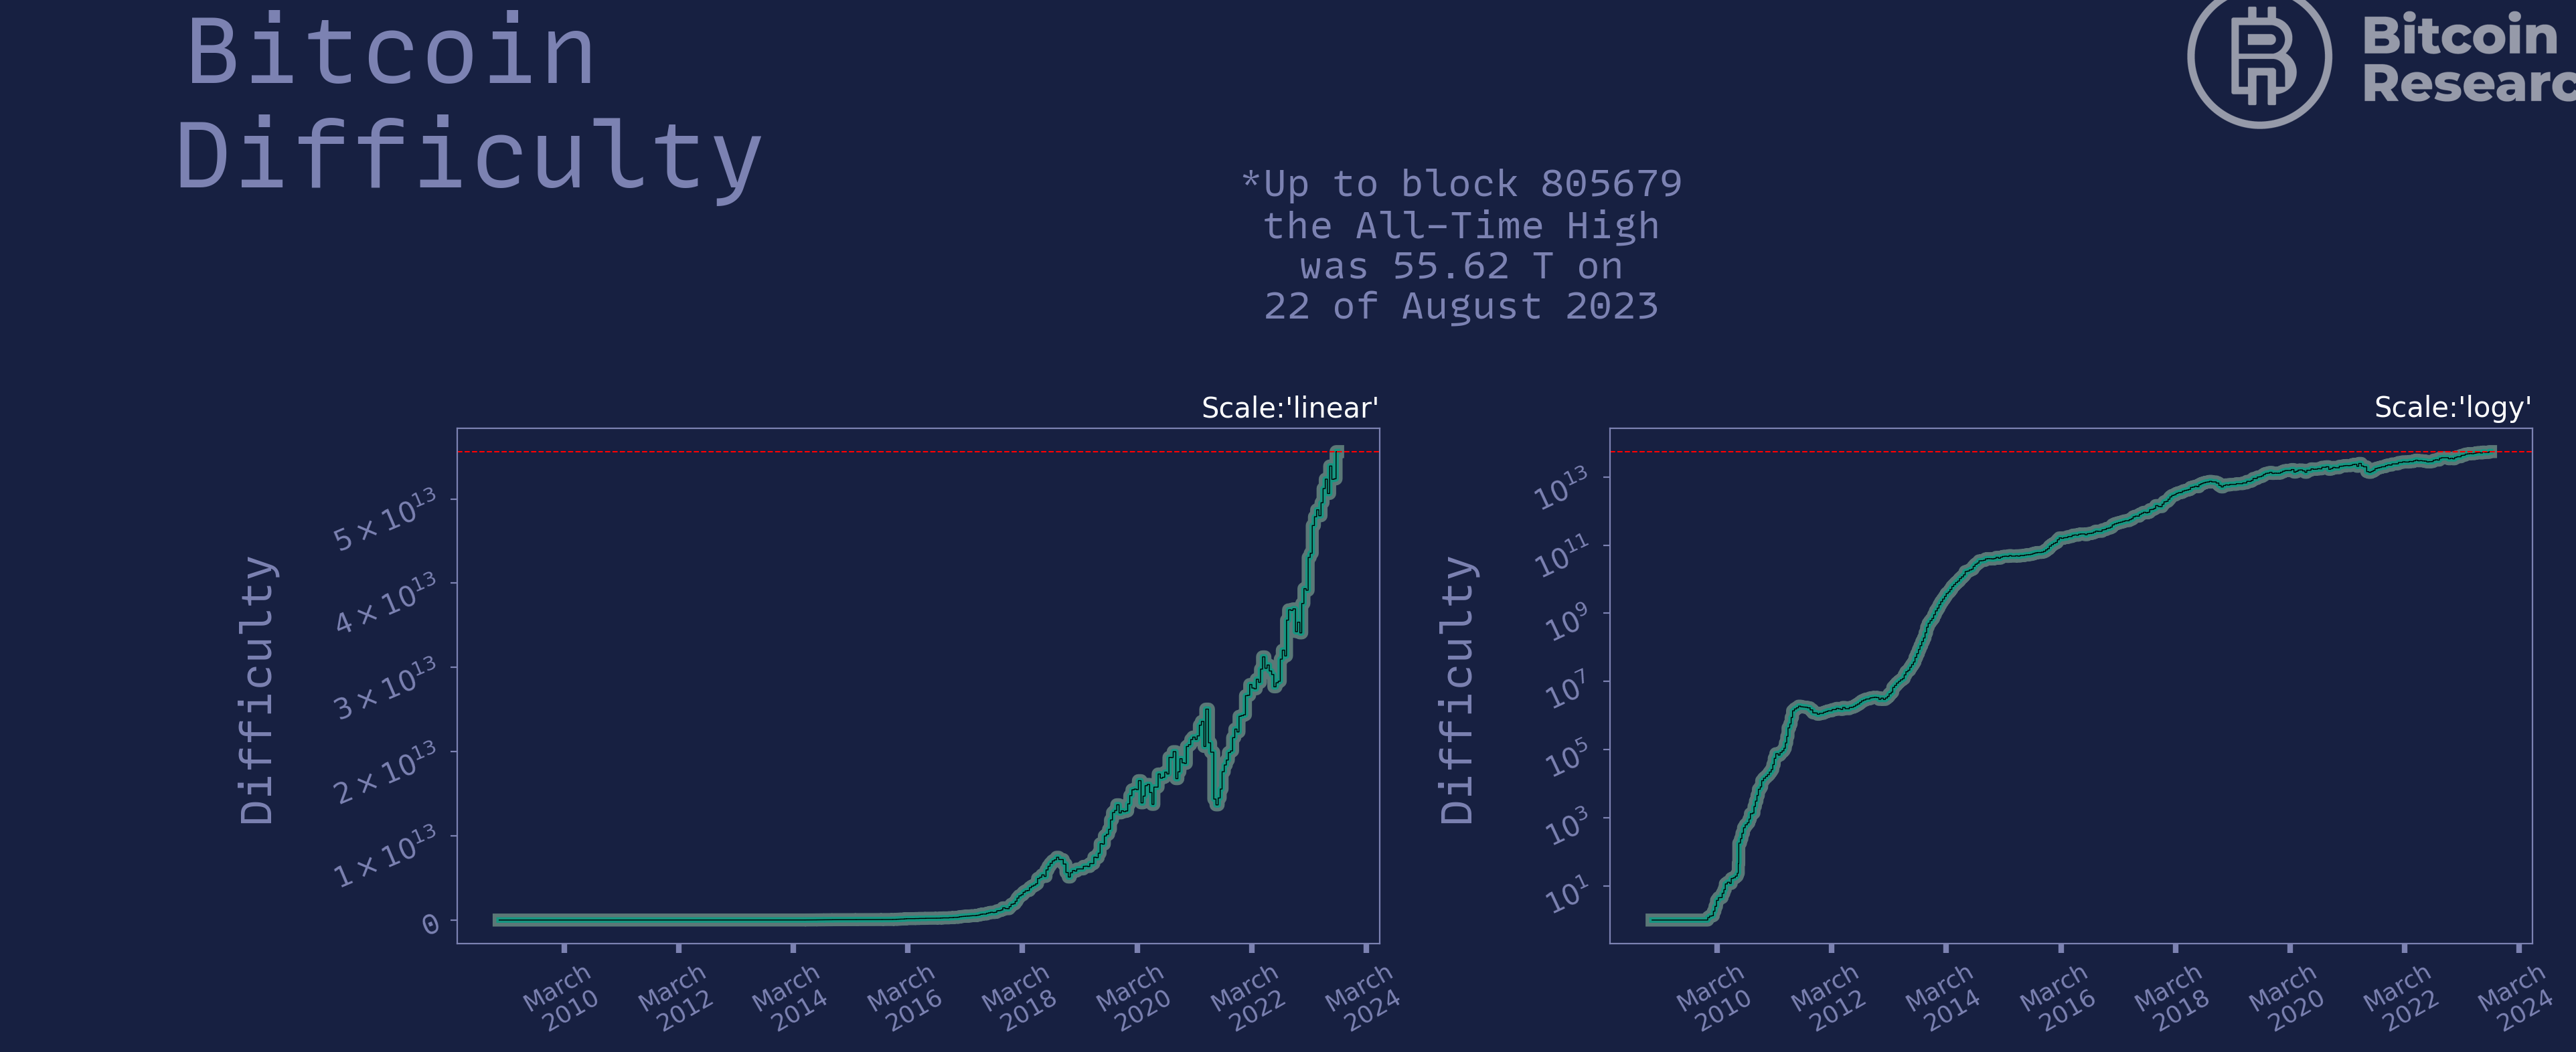

In [1]:
# este script construye la gráfica histórica
# del tamaño de bloques en Bitcoin

# este script construye un gráfico de la evolución del tamaño de bloques
# a lo largo del cada bloque

# librerias a usar
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager as fm
from PIL import Image
from datetime import datetime
from app.styles import Estilos, colores
from app.readata import leer_data,time_data,estado_data,last_block

# os.chdir('D:/proyectos/BitcoinResearch//BitcoinResearch/')

# Cambiar la tipografia
fpath = os.path.join('bins/MonoLisaSimpson.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

def bits_to_difficulty(bits):
   bits = int(bits, 16)
   # Convertir bits a un número de 256 bits en formato big-endian
   target = (bits & 0x007fffff) * 2 ** (8 * ((bits >> 24) - 3)) 
   # Calcular la dificultad como el cociente entre el objetivo máximo y el objetivo actual
   max_target = 0xffff * 2 ** (8 * (0x1d - 3))
   difficulty = max_target / target
   return difficulty


def crear_imagen_total(tipo='estilo_dark'):
        # Color del fondo
    fig, ax = plt.subplots(1,2,figsize=(20,5), dpi=200)
    fig.patch.set_facecolor(Estilos[tipo][1])
    ax[0].patch.set_facecolor(Estilos[tipo][1])
    ax[1].patch.set_facecolor(Estilos[tipo][1])

    preferencias = {'color':Estilos[tipo][0],'fontproperties':prop}

    plt.suptitle("Bitcoin\n   Difficulty",fontsize=50,y=1.5,x=0.1,**preferencias)
    bits,time_s = leer_data('bits','time_b')
    difficulty = np.array([bits_to_difficulty(a) for a in bits])
    time = time_data(time_s)
    
    ax[0].plot(time,difficulty,color=colores[3],zorder=1,linewidth=7)
    ax[0].plot(time,difficulty,color=colores[2],zorder=1,linewidth=3)
    ax[0].plot(time,difficulty,color=colores[1],zorder=1,linewidth=0.5)
    


    #ax[0].set_yscale('log')
    locator = mdates.MonthLocator(interval=24)
    formatter = mdates.DateFormatter('%B\n%Y')
    ax[0].xaxis.set_major_locator(locator)
    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].xaxis.set_tick_params(labelsize=13, rotation=30,length=5,width=3)
    ax[0].tick_params(axis='both',colors=Estilos[tipo][0])
    ax[0].set_ylabel('Difficulty\n', fontsize=23,**preferencias)
    ax[0].set_title("Scale:'linear'",loc='right',fontsize=15,color='white')
    ax[0].axhline(difficulty.max(),linestyle='dashed',color='red',linewidth=0.75)
    ax[1].axhline(difficulty.max(),linestyle='dashed',color='red',linewidth=0.75)

    ax[1].plot(time,difficulty,color=colores[3],zorder=1,linewidth=7)
    ax[1].plot(time,difficulty,color=colores[2],zorder=1,linewidth=3)
    ax[1].plot(time,difficulty,color=colores[1],zorder=1,linewidth=0.5)
    


    ax[1].set_yscale('log')
    locator = mdates.MonthLocator(interval=24)
    formatter = mdates.DateFormatter('%B\n%Y')
    ax[1].xaxis.set_major_locator(locator)
    ax[1].xaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_tick_params(labelsize=13, rotation=30,length=5,width=3)
    ax[1].tick_params(axis='both',colors=Estilos[tipo][0])
    ax[1].set_ylabel('Difficulty\n', fontsize=23,**preferencias)

    ax[1].set_title("Scale:'logy'",loc='right',fontsize=15,color='white')
       
    ax[0].set_yticks([0,1e13,2e13,3e13,4e13,5e13])
    ytick_labels = ['0',r"$1\times10^{13}$",r"$2\times10^{13}$",r"$3\times10^{13}$",r"$4\times10^{13}$",r"$5\times10^{13}$"]
    ax[0].set_yticklabels(ytick_labels,rotation=23,**preferencias)
    ax[0].yaxis.set_tick_params(labelsize=15)

    ax[1].tick_params(axis='y',labelsize=15,rotation=25)  # Cambia 20 al tamaño que prefieras

    


    for spine in ax[0].spines.values():
        spine.set_color(Estilos[tipo][0])
    for spine in ax[1].spines.values():
        spine.set_color(Estilos[tipo][0])

    if tipo[7:8]=='d':
        tw1 = Image.open('bins/br_w.png')
    else:
        tw1 = Image.open('bins/br_d.png')


    tw1_resized = tw1.resize((int(tw1.width * 0.65), int(tw1.height * 0.65)))  # Reduce el tamaño de la imagen a la mitad
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
    tw1_array = np.array(tw1_resized)


# Usa el índice para obtener la fecha correspondiente
    fecha_datetime = datetime.strptime(time_s[np.argmax(difficulty)][:10],'%Y-%m-%d')
    formatted_date = fecha_datetime.strftime('%d of %B %Y')
    mss1 = '*Up to block ' + str(last_block())+'\nthe All-Time High\nwas '
    mss2 = str(round(difficulty.max()/1e12,2))+' T on\n'+str(formatted_date)

    fig.text(0.5,1.15,mss1+mss2, ha='center', va='center', fontsize=20,**preferencias)

    fig.figimage(tw1_array, xo=3100, yo=1000, alpha=0.55, zorder=1)
    plt.subplots_adjust(wspace=0.25)
    plt.savefig('analisis/resultados/dificultad_total_'+tipo+'.png',bbox_inches='tight',pad_inches=0.5)



for a in Estilos.keys():
    crear_imagen_total(a)
    break 

In [2]:
# importamos librerias a usar

import numpy as np
import pandas as pd
from app.readata import leer_data, time_data, last_block



# tomamos los valores de la red
chainw, timestamp = leer_data('chainwork','time_b')

# procesamos los datos del tiempo para obtener en segundos 
time = time_data(timestamp[1:])
time_block = pd.Series(pd.to_datetime(timestamp)).diff().dt.total_seconds().dropna().replace(0, 1)

window=4*2016
chainwork = pd.Series([int(a,16) for a in chainw]).diff().dropna()

hashrate  = pd.Series([(chainwork[a]/1e18)/time_block[a] for a in range(1,len(time_block)+1)])
hashrate_smoothed = hashrate.rolling(window).median().fillna(np.mean(hashrate[:window]))

In [31]:
time[np.argmax(time_block)]

14387.0

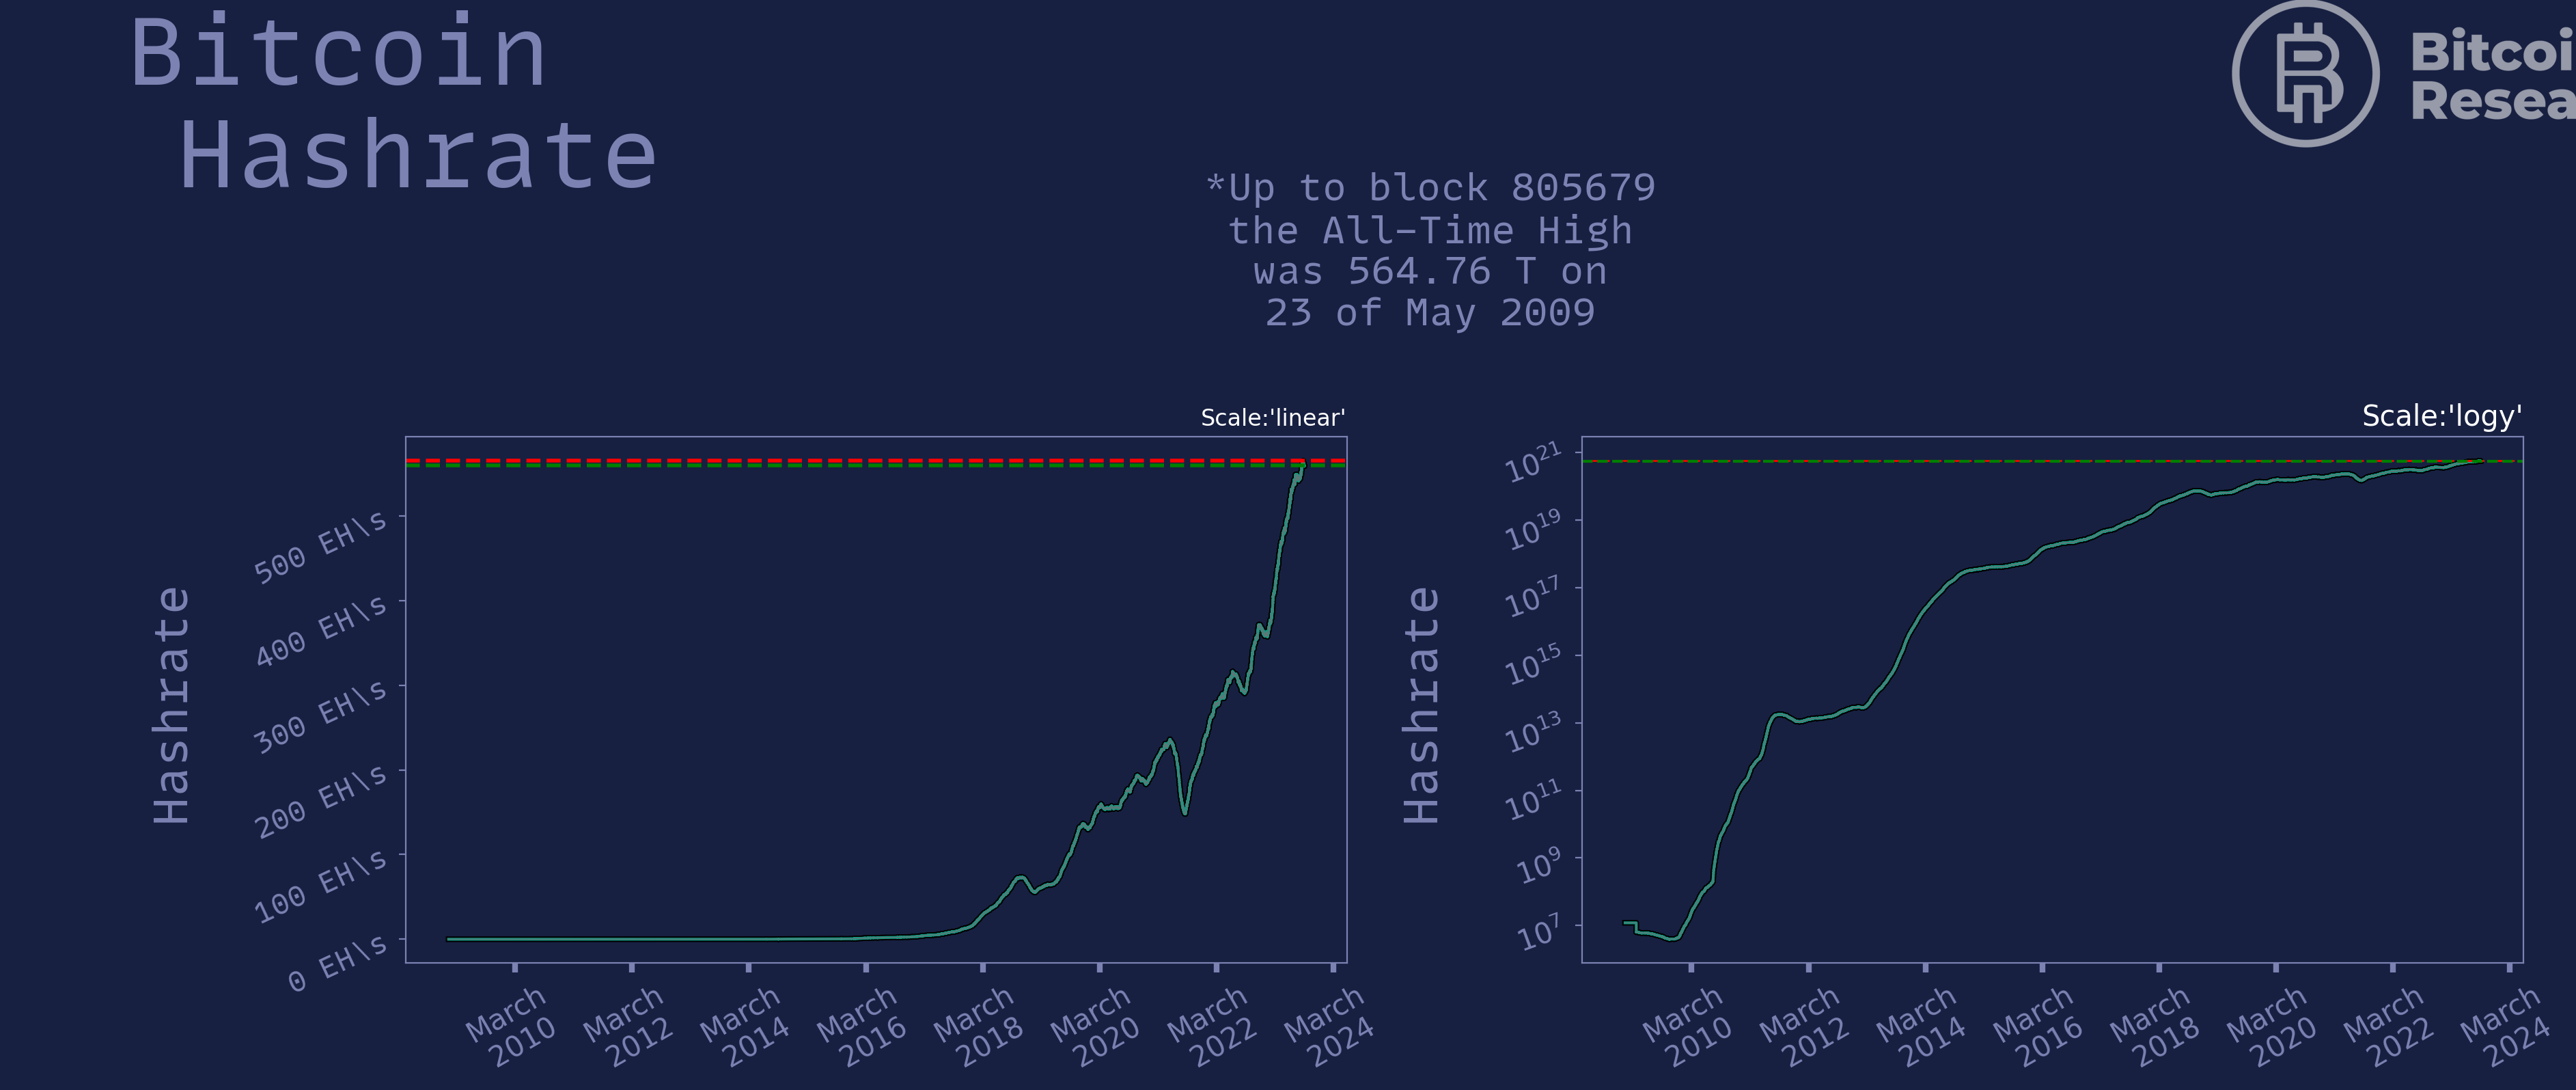

In [35]:
# Cambiar la tipografia
fpath = os.path.join('bins/MonoLisaSimpson.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]


def crear_imagen_total(tipo='estilo_dark'):
        # Color del fondo
    fig, ax = plt.subplots(1,2,figsize=(20,5), dpi=200)
    fig.patch.set_facecolor(Estilos[tipo][1])
    ax[0].patch.set_facecolor(Estilos[tipo][1])
    ax[1].patch.set_facecolor(Estilos[tipo][1])

    preferencias = {'color':Estilos[tipo][0],'fontproperties':prop}

    plt.suptitle("Bitcoin\n   Hashrate",fontsize=50,y=1.5,x=0.1,**preferencias)

    ax[0].plot(time,hashrate_smoothed,color=colores[1],zorder=1,linewidth=3)
    ax[0].plot(time,hashrate_smoothed,color=colores[2],zorder=1,linewidth=1.5)
    ax[0].plot(time,hashrate_smoothed,color=colores[3],zorder=1,linewidth=0.5)
    


    #ax[0].set_yscale('log')
    locator = mdates.MonthLocator(interval=24)
    formatter = mdates.DateFormatter('%B\n%Y')
    ax[0].xaxis.set_major_locator(locator)
    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].xaxis.set_tick_params(labelsize=15, rotation=30,length=5,width=3)
    ax[0].tick_params(axis='both',colors=Estilos[tipo][0])
    ax[0].set_ylabel('Hashrate\n', fontsize=25,**preferencias)
    ax[0].set_title("Scale:'linear'",loc='right',fontsize=12,color='white')
    
    ax[0].axhline(hashrate_smoothed.max(),linestyle='dashed',color='red',linewidth=2)
    ax[1].axhline(1e18*hashrate_smoothed.max(),linestyle='dashed',color='red',linewidth=1)

    ax[0].axhline(hashrate_smoothed.iloc[-1],linestyle='dashed',color='green',linewidth=2)
    ax[1].axhline(1e18*hashrate_smoothed.iloc[-1],linestyle='dashed',color='green',linewidth=1.5)


    ax[1].plot(time,hashrate_smoothed*1e18,color=colores[1],zorder=1,linewidth=3)
    ax[1].plot(time,hashrate_smoothed*1e18,color=colores[2],zorder=1,linewidth=1.5)
    ax[1].plot(time,hashrate_smoothed*1e18,color=colores[3],zorder=1,linewidth=0.5)
    


    ax[1].set_yscale('log')
    locator = mdates.MonthLocator(interval=24)
    formatter = mdates.DateFormatter('%B\n%Y')
    ax[1].xaxis.set_major_locator(locator)
    ax[1].xaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_tick_params(labelsize=15, rotation=30,length=5,width=3)
    ax[1].tick_params(axis='both',colors=Estilos[tipo][0])
    ax[1].set_ylabel('Hashrate\n', fontsize=25,**preferencias)

    ax[1].set_title("Scale:'logy'",loc='right',fontsize=15,color='white')
       
    ax[0].set_yticks([0,1e2,2e2,3e2,4e2,5e2])
    ytick_labels = ['0 EH\s','100 EH\s','200 EH\s','300 EH\s','400 EH\s','500 EH\s']
    ax[0].set_yticklabels(ytick_labels,rotation=23,**preferencias)
    ax[0].yaxis.set_tick_params(labelsize=15)
    ax[0].tick_params(axis='y',labelsize=15,rotation=25)  # Cambia 20 al tamaño que prefieras
       

    ax[1].yaxis.set_tick_params(labelsize=23,rotation=20)
    ax[1].tick_params(axis='y',labelsize=15,rotation=20)  # Cambia 20 al tamaño que prefieras

    
    


    for spine in ax[0].spines.values():
        spine.set_color(Estilos[tipo][0])
    for spine in ax[1].spines.values():
        spine.set_color(Estilos[tipo][0])

    if tipo[7:8]=='d':
        tw1 = Image.open('bins/br_w.png')
    else:
        tw1 = Image.open('bins/br_d.png')


    tw1_resized = tw1.resize((int(tw1.width * 0.65), int(tw1.height * 0.65)))  # Reduce el tamaño de la imagen a la mitad
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
    tw1_array = np.array(tw1_resized)


# Usa el índice para obtener la fecha correspondiente
    fecha_datetime = datetime.strptime(timestamp[np.argmax(time_block)+1][:10],'%Y-%m-%d')
    formatted_date = fecha_datetime.strftime('%d of %B %Y')
    mss1 = '*Up to block ' + str(last_block())+'\nthe All-Time High\nwas '
    mss2 = str(round(hashrate_smoothed.max(),2))+' T on\n'+str(formatted_date)

    fig.text(0.5,1.15,mss1+mss2, ha='center', va='center', fontsize=20,**preferencias)

    fig.figimage(tw1_array, xo=3100, yo=1000, alpha=0.55, zorder=1)
    plt.subplots_adjust(wspace=0.25)
    plt.show()
    #plt.savefig('analisis/resultados/dificultad_total_'+tipo+'.png',bbox_inches='tight',pad_inches=0.5)


for a in Estilos.keys():
    crear_imagen_total(a)
    break 


In [12]:
print([a for a in range(19) if a % 2 == 0])


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
